In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import h5py
import numpy as np

In [6]:
## Functions. put this in a separate file later. 
def hdf5_to_dict(path): 
    _dict = {}
    with h5py.File(path) as HDF5_file:
        for key in HDF5_file.keys():
            _dict[key] = np.array(HDF5_file[key])
    return _dict

<b>Load data</b>

In [7]:
path = 'C:/Users/Michael Forsthofer/OneDrive - University of Sussex/BadenLab/2p-imaging/St52/'
cluster_file = 'SMP_x240716_1_s4.h5'

data = hdf5_to_dict(path + cluster_file)

<b>Group clusters based on IGOr processes</b>

In [153]:
cluster_allocations = data['Cluster_Allocations0']
cluster_means = data['Cluster_Means0']
average_traces = data['Averages0']
raw_traces = data['Snippets0']
time = data['SnippetsTimes0']
time = time[:,:,:]-time[0,:,:]

<b>Plot things</b>

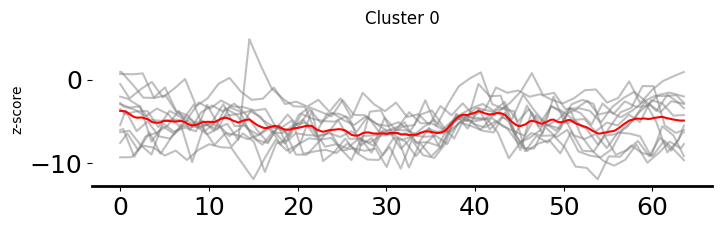

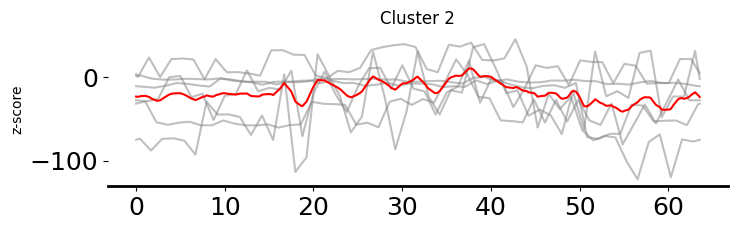

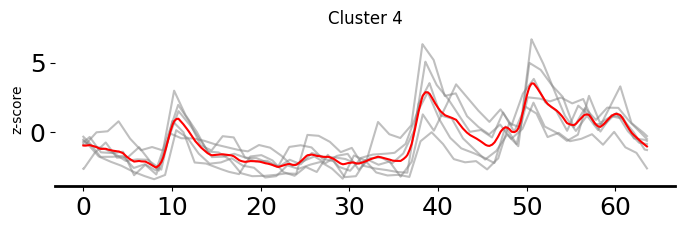

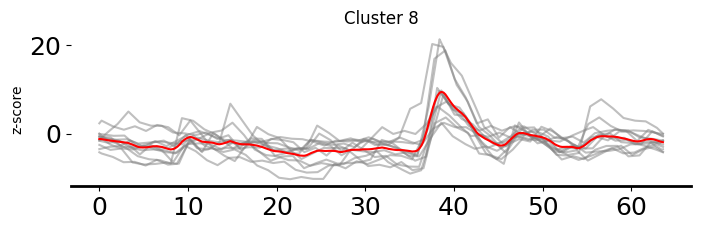

In [187]:
clusters_to_plot = [0, 2, 4, 8]
for cur_cluster in clusters_to_plot:   
    fig, ax = plt.subplots(figsize = (8, 2))
    cluster_locs = np.where(cluster_allocations == cur_cluster)[0]
    #ax.plot(average_traces[:,cluster_locs], color = 'grey', alpha=0.5)
    for i in cluster_locs:
        ax.plot(np.vstack(time[:,:,i]), np.vstack(raw_traces[:,:,i]), color = 'grey', alpha=0.5)
    ax.plot(time[:,1,i], cluster_means[:-1,cur_cluster], color = 'red')
    ax.set_title('Cluster {}'.format(cur_cluster))
    ax.set_ylabel('z-score')
    axe = plt.gca()  # Get the current axis
    axe.spines['top'].set_visible(False)
    axe.spines['right'].set_visible(False)

    # Optionally, you can also adjust the bottom and left axis
    axe.spines['left'].set_visible(False)
    axe.spines['bottom'].set_visible(True)
    axe = plt.gca()  # Get the current axis

    axe.spines['left'].set_linewidth(2)
    axe.spines['bottom'].set_linewidth(2)
    axe.spines['bottom'].set_linewidth(2) 
    axe.tick_params(axis='both', which='major', labelsize=18)
    fig.savefig('SMP_x240716_1_s4_cluster_{}.svg'.format(cur_cluster), format='svg', transparent=True)





In [160]:
time[:,1,1]

array([0.0000000e+00, 1.9531250e-03, 3.9138794e-03, ..., 6.3544571e+01,
       6.3546524e+01, 6.3548477e+01], dtype=float32)